# Lead Scoring Case Study
*Identification of Hot Leads to focus more on them and thus enhancing the conversion ratio*

NAME:-  NIKHIL DHIMAN
EMAIL:- nikhildhiman3644@gmail.com

## Business Objective

We must divide the leads into hot leads and cold leads in order to categorise or group them.
Analyzing prior data offered by X Education Company will be used to accomplish this.
The employee of the company will then concentrate on effectively communicating with the hot leads to ensure that the majority of them really convert.
We have a target conversion rate of 80%, thus in order to hit that goal, we must appropriately classify the leads. 



---



## Loading Libraries and global settings

In [593]:
# Libraries & Files Importing 
import pandas as panda
import matplotlib.pyplot as plt
import numpy as numpy
import seaborn as snsb
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics


In [594]:
# Raising the presentational stakes 

# Take warnings off 
import warnings
warnings.filterwarnings('ignore')

# Enhanced HTML Display 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Optionally setting Pandas
panda.set_option('display.max_info_rows',200)
panda.set_option('display.max_columns',200)
panda.set_option('display.max_colwidth',255)
panda.set_option('display.width',200)
panda.set_option('display.html.border',1)
panda.set_option('display.max_info_columns',200)



---



## Data Loading and Data Displaying 

In [595]:
# csv file data loading 
df_data = panda.read_csv(r"/Users/apple/Desktop/Leads.csv")
# Printing some data.
df_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [596]:
# Dataframe OverView
# Printing Shape
print('Shape:', df_data.shape)
# Printing Information
print('Information')
print(df_data.info())

Shape: (9240, 37)
Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   Prospect ID                                    object 
 1   Lead Number                                    int64  
 2   Lead Origin                                    object 
 3   Lead Source                                    object 
 4   Do Not Email                                   object 
 5   Do Not Call                                    object 
 6   Converted                                      int64  
 7   TotalVisits                                    float64
 8   Total Time Spent on Website                    int64  
 9   Page Views Per Visit                           float64
 10  Last Activity                                  object 
 11  Country                                        object 
 12  Specialization    

In [597]:
# Null Values and Numeric Columns Description 
# Description of Numeric column
print('Description of Numeric column')
print(df_data.describe())
# Null values percentage
print('Null values percentage')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Description of Numeric column
         Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [598]:
# Rating for Past Order Conversion 
round(len(df_data[df_data['Converted']==1].index)/len(df_data.index)*100,2)

38.54



---



## Data Cleaning Part - 1 : For Columns

In [599]:
# Remove all of the redundant rows. 
df_data=df_data.drop_duplicates()

In [600]:
# Since "Select" indicates that the user who filled out the form did not select any values, "NaN" should be used in place of that value. 
df_data = df_data.replace('Select', numpy.nan)
# Percentage of null values per column
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [601]:
# categorical columns seen via the lens of analysis 
cat_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

# Choosing a random number greater than 20% Nan values for useless columns 
un_column = set((panda.isnull(df_data).sum()/len(df_data.index) > .2).index)

# Analysis columns that are not necessary 
un_column = {'Prospect ID', 'Lead Number'}

# Numerical columns viewed from an analytical perspective 
numeri_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

# Goal column 
goal_column = {'Converted'}

In [602]:
# Dropping un-usable and un-necessary columns
df_data = df_data[list(numeri_column | cat_column | goal_column)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Do Not Email                                0.00
X Education Forums                          0.00
Lead Source                                 0.39
Search                                      0.00
Converted                                   0.00
Digital Advertisement                       0.00
A free copy of Mastering The Interview      0.00
Do Not Call                                 0.00
Through Recommendations                     0.00
Lead Origin                                 0.00
Total Time Spent on Website                 0.00
Receive More Updates About Our Courses      0.00
I agree to pay the amount through cheque    0.00
Last Activity                               1.11
TotalVisits                                 1.48
Update me on Supply Chain Content           0.00
Magazine                                    0.00
Last Notable Activity                       0.00
Page Views Per Visit                        1.48
Newspaper Article                           0.00
Newspaper           

In [603]:
# Remove columns with with very less variations
df_data[list(cat_column)].describe()

,Do Not Email,X Education Forums,Lead Source,Search,Digital Advertisement,A free copy of Mastering The Interview,Do Not Call,Through Recommendations,Lead Origin,Receive More Updates About Our Courses,I agree to pay the amount through cheque,Last Activity,Update me on Supply Chain Content,Magazine,Last Notable Activity,Newspaper Article,Newspaper,Get updates on DM Content
count,9240,9240,9204,9240,9240,9240,9240,9240,9240,9240,9240,9137,9240,9240,9240,9240,9240,9240
unique,2,2,21,2,2,2,2,2,5,1,1,17,1,1,16,2,2,1
top,No,No,Google,No,No,No,No,No,Landing Page Submission,No,No,Email Opened,No,No,Modified,No,No,No
freq,8506,9239,2868,9226,9236,6352,9238,9233,4886,9240,9240,3437,9240,9240,3407,9238,9239,9240


In [604]:
# Removing columns with no variance

un_column.add('Get updates on DM Content')
cat_column.remove('Get updates on DM Content')
un_column.add('Newspaper Article')
cat_column.remove('Newspaper Article')
un_column.add('Magazine')
cat_column.remove('Magazine')
un_column.add('I agree to pay the amount through cheque')
cat_column.remove('I agree to pay the amount through cheque')
un_column.add('Receive More Updates About Our Courses')
cat_column.remove('Receive More Updates About Our Courses')
un_column.add('Update me on Supply Chain Content')
cat_column.remove('Update me on Supply Chain Content')
un_column.add('Newspaper')
cat_column.remove('Newspaper')
un_column.add('Through Recommendations')
cat_column.remove('Through Recommendations')
un_column.add('Search')
cat_column.remove('Search')
un_column.add('Do Not Call')
cat_column.remove('Do Not Call')
un_column.add('Digital Advertisement')
cat_column.remove('Digital Advertisement')
un_column.add('X Education Forums')
cat_column.remove('X Education Forums')
df_data = df_data[list(numeri_column | cat_column | goal_column)]
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Do Not Email                              0.00
Lead Source                               0.39
Lead Origin                               0.00
Total Time Spent on Website               0.00
Last Activity                             1.11
Converted                                 0.00
TotalVisits                               1.48
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
Page Views Per Visit                      1.48
dtype: float64



---



## Data Cleaning Part - 2 (Rows)

In [605]:
# Choosing a random number greater than 20% Nan values for useless rows
threshold_value = int(.2*len(df_data.columns))
df_data.dropna(thresh=2, inplace=True)

In [606]:
# Obtaining % of NaN values in a new Dataframe 
# Percentage of columns with no values 
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


Do Not Email                              0.00000
Lead Source                               0.38961
Lead Origin                               0.00000
Total Time Spent on Website               0.00000
Last Activity                             1.11472
Converted                                 0.00000
TotalVisits                               1.48268
Last Notable Activity                     0.00000
A free copy of Mastering The Interview    0.00000
Page Views Per Visit                      1.48268
dtype: float64

In [607]:
# Now, Let us now Observing Categorical Columns
df_data[list(cat_column)].describe()

,Do Not Email,Lead Source,A free copy of Mastering The Interview,Lead Origin,Last Activity,Last Notable Activity
count,9240,9204,9240,9240,9137,9240
unique,2,21,2,5,17,16
top,No,Google,No,Landing Page Submission,Email Opened,Modified
freq,8506,2868,6352,4886,3437,3407


In [608]:
# 'Last Activity' have 1.33841 % 'NaN' values
df_data[['Last Activity']] = df_data[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.34116 % 'NaN' values
df_data[['Lead Source']]=df_data[['Lead Source']].fillna(value='Google')

In [609]:
# Observing Numeric Columns
df_data[list(numeri_column)].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9103.000000,9103.000000,9240.000000
mean,3.445238,2.362820,487.698268
std,4.854853,2.161418,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
max,251.000000,55.000000,2272.000000


In [610]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
df_data[['Page Views Per Visit']]=df_data[['Page Views Per Visit']].fillna(value=df_data[['Page Views Per Visit']].mean())
df_data[['TotalVisits']]=df_data[['TotalVisits']].fillna(value=df_data[['TotalVisits']].mean())

In [611]:
# Obtaining % of NaN values in a new Dataframe 
# Percentage of null values per column
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Total Time Spent on Website               0.0
Last Activity                             0.0
Converted                                 0.0
TotalVisits                               0.0
Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
Page Views Per Visit                      0.0
dtype: float64

In [612]:
# New Dataframe's form
print("Shape of Data:",df_data.shape)
print(df_data.head)

Shape of Data: (9240, 10)
<bound method NDFrame.head of      Do Not Email     Lead Source              Lead Origin  Total Time Spent on Website            Last Activity  Converted  TotalVisits Last Notable Activity A free copy of Mastering The Interview  \
0              No      Olark Chat                      API                            0  Page Visited on Website          0          0.0              Modified                                     No   
1              No  Organic Search                      API                          674             Email Opened          0          5.0          Email Opened                                     No   
2              No  Direct Traffic  Landing Page Submission                         1532             Email Opened          1          2.0          Email Opened                                    Yes   
3              No  Direct Traffic  Landing Page Submission                          305              Unreachable          0          1.0    



---



## Exploratory Data Analysis (I)

In [613]:
# A function for univariate analysis is offered by numerical columns. 
def numColUniAnalysis(c):
  plt.figure(figsize=(5, 5))
  ax = snsb.boxplot(y=c, data=df_data)
  plt.show()

In [614]:
# function for categorical columns in univariate analysis 
def catColUniAnalysis(c):
  snsb.catplot(y=c, data=df_data, kind="count")
  plt.show()

In [615]:
# Bivariate analysis function for numerical columns 
def numColBivariateAnalysis(c1,c2):
  plt.figure(figsize=(5, 5))
  ax = snsb.boxplot(x=c1, y=c2, data=df_data)
  plt.show()

In [616]:
# Function for bivariate analysis on category columns
def catColBivariateAnalysis(c1,c2):
  snsb.catplot(col=c1 ,y=c2, data=df_data, kind="count")
  plt.show()

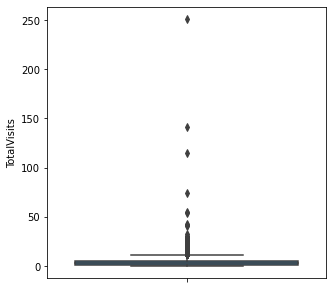

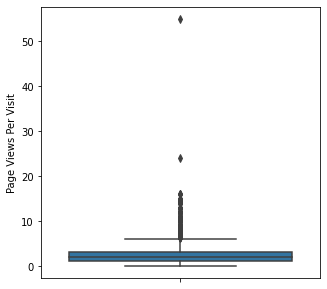

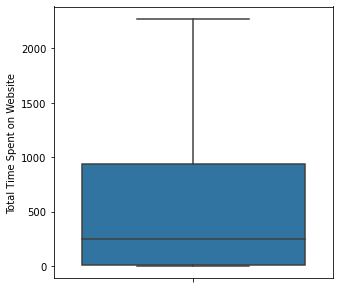

In [617]:
# Analysis of Numerical Columns with One Variable 
# making a loop to do univariate analysis on numerical columns
for c in numeri_column:
  numColUniAnalysis(c)

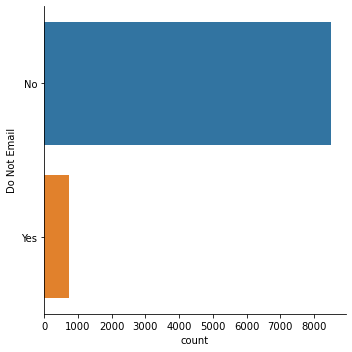

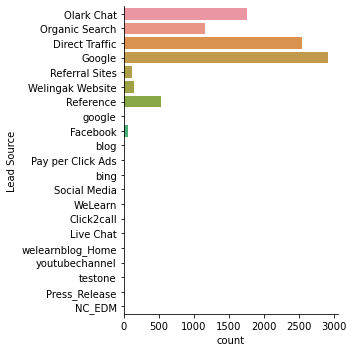

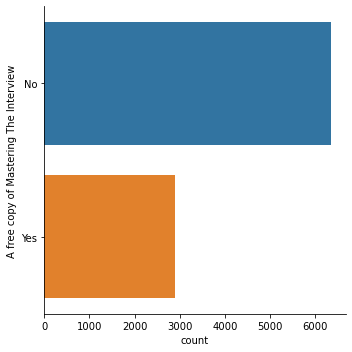

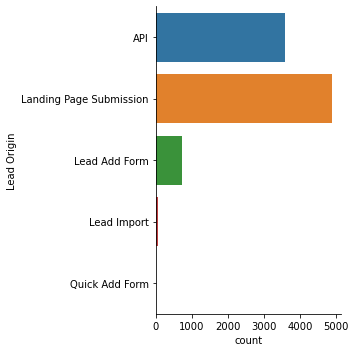

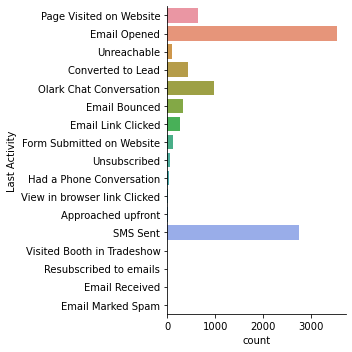

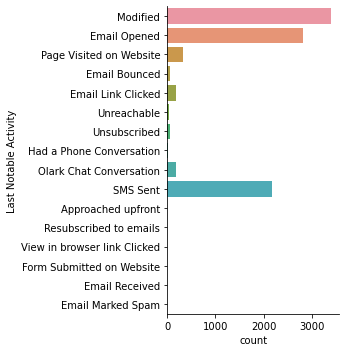

In [618]:
# Univariate Analysis of categorical Columns
# to perform a Univariate analysis on categorical columns, create a loop 
for c in cat_column:
  catColUniAnalysis(c)

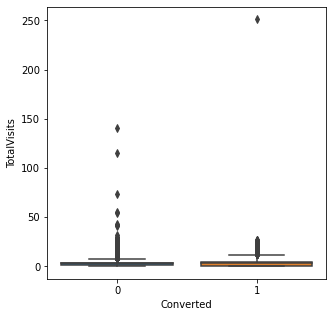

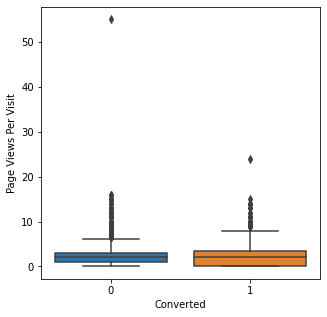

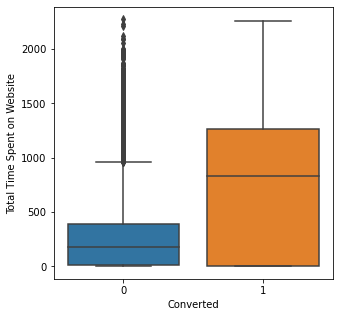

In [619]:
# Bivariate Analysis of Numerical Columns
# constructing a loop to perform bivariate analysis on numerical columns 
for c in numeri_column:
  numColBivariateAnalysis('Converted',c)

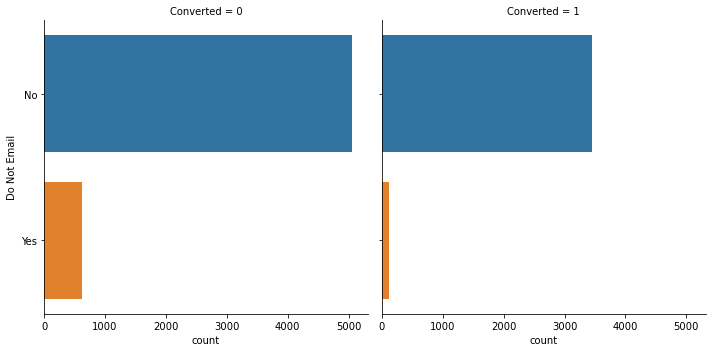

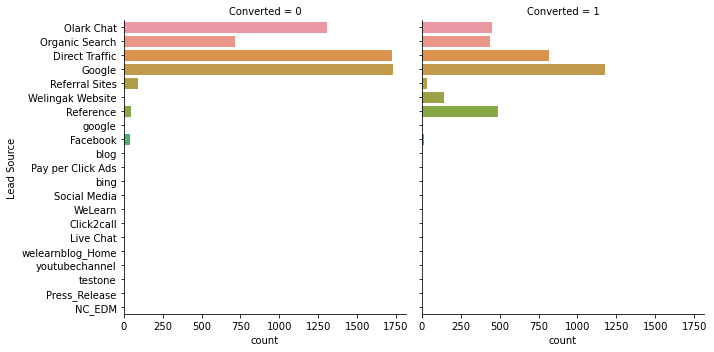

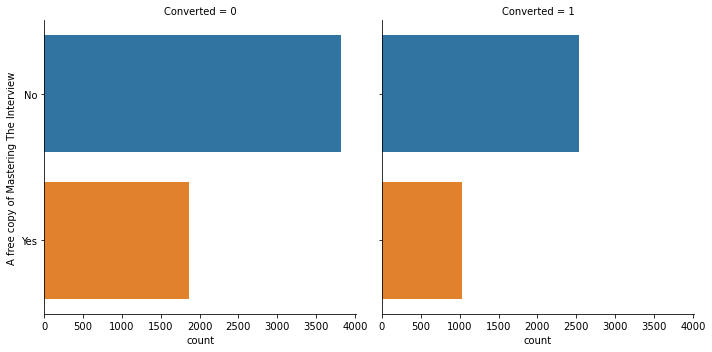

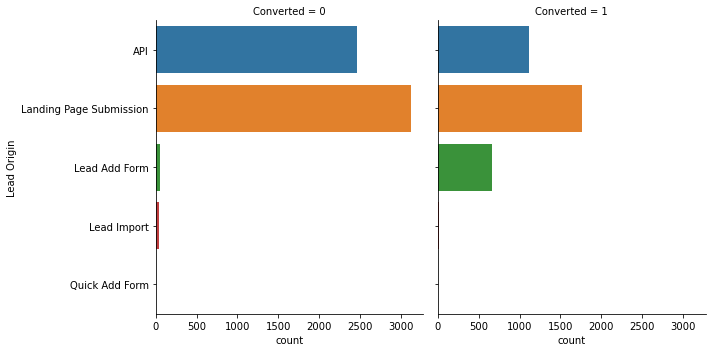

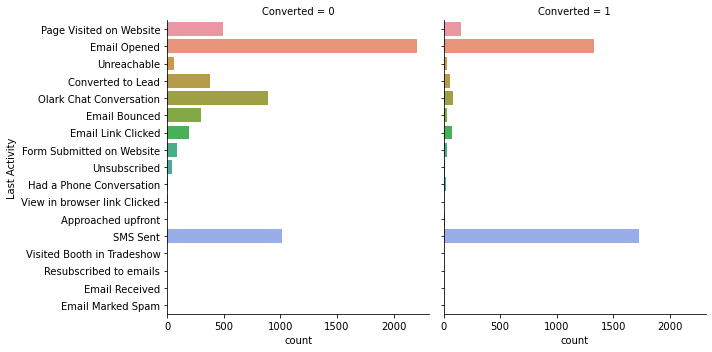

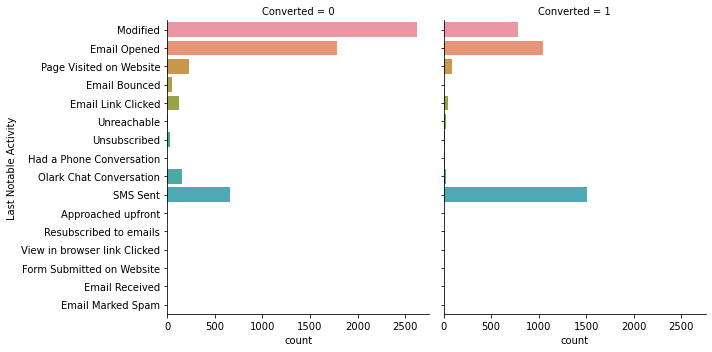

In [620]:
# Bivariate Analysis of Categorical Columns
# the creation of a loop to do bivariate analysis on categorical columns 
for cat in cat_column:
  cat_col_bivariate_analysis('Converted',cat)

<AxesSubplot:>

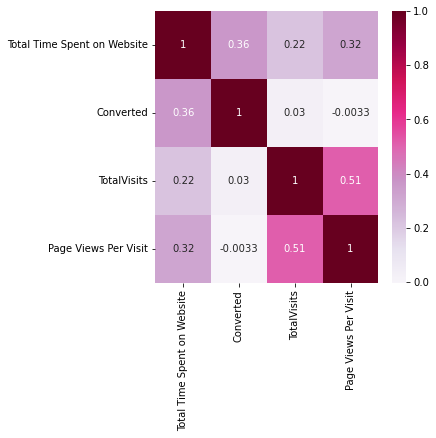

In [621]:
# Correlation between all set of usable columns

plt.figure(figsize=(5, 5))
snsb.heatmap(df_data.corr(), cmap="PuRd",annot=True)

**Summary**: The following conclusions follow EDA1. 

1.   Conclusion from a Univariate Analysis: 
    *  *Page Views Per Visit* and *Total Visits* show little fluctuation. 
    *  The *Total Time Spent on Website* varies more frequently. 
    *  *Page Views Per Visit* and *Total Visits* both have anomalies. 

2.   Conclusion from Bivariate Analysis:
    *   *Total time spent on the website* and *conversion* are positively correlated. 
    
3.   Conclusion from Correlation Analysis (Heatmap):
    *   *Total website time spent* and *conversion* have a positive association. 




---



## Dummy variables

In [622]:
# a list of the columns needed to create dummy variables 
df_data[list(cat_column)].describe()

,Do Not Email,Lead Source,A free copy of Mastering The Interview,Lead Origin,Last Activity,Last Notable Activity
count,9240,9240,9240,9240,9240,9240
unique,2,21,2,5,17,16
top,No,Google,No,Landing Page Submission,Email Opened,Modified
freq,8506,2904,6352,4886,3540,3407


In [623]:
# Creating dummy varaiables and drop_first to avoid multicollinearity
df_data = panda.get_dummies(data=df_data, columns=list(cat_column), drop_first=True)
del cat_column
df_data_usable_columns = set(df_data.columns)
print(df_data.head) 

<bound method NDFrame.head of       Total Time Spent on Website  Converted  TotalVisits  Page Views Per Visit  Do Not Email_Yes  Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0                               0          0          0.0                  0.00                 0                           0                     0                   0                      0   
1                             674          0          5.0                  2.50                 0                           0                     0                   0                      0   
2                            1532          1          2.0                  2.00                 0                           1                     0                   0                      0   
3                             305          0          1.0                  1.00                 0                           1                     0                   0                      0   




---



## Exploratory Data Analysis 2

In [624]:
# the creation of a function for bivariate analysis 
def bivariateAnalysis(c1,c2):
  snsb.catplot(col=c1 ,y=c2, data=df_data, kind="count", height=2)
  plt.show()

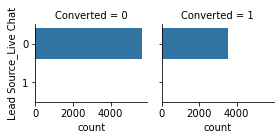

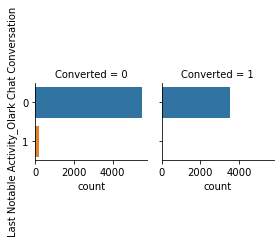

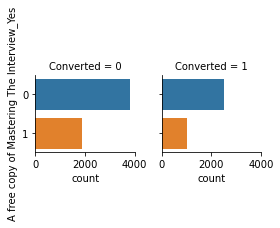

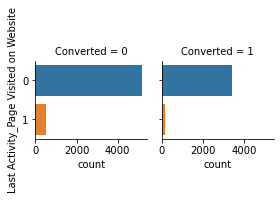

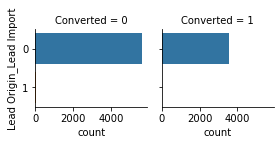

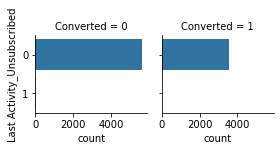

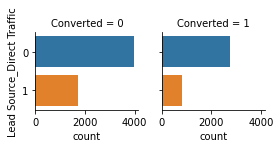

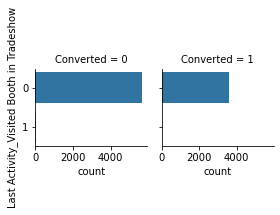

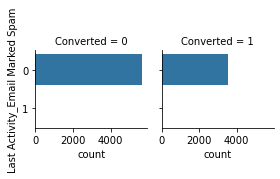

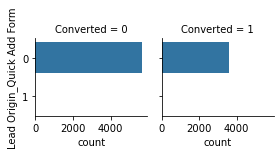

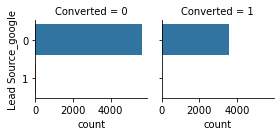

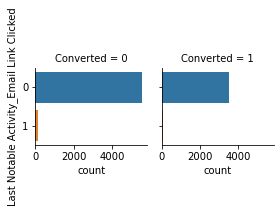

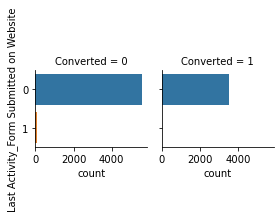

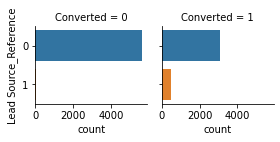

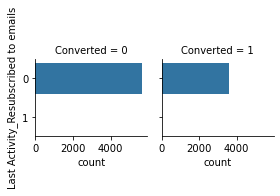

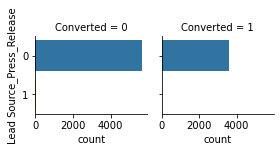

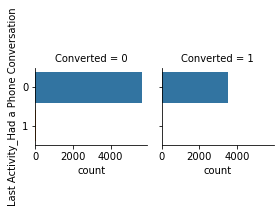

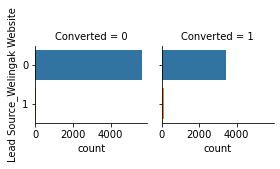

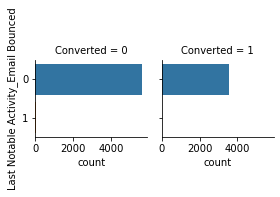

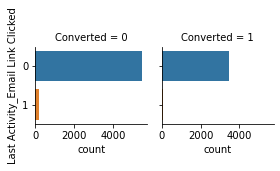

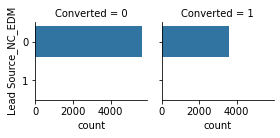

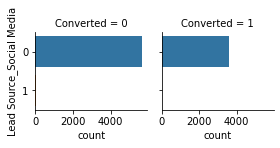

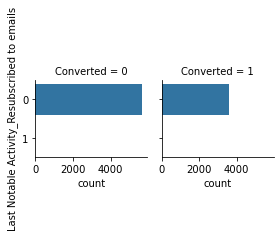

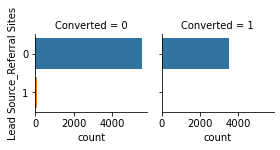

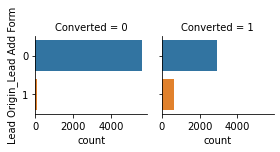

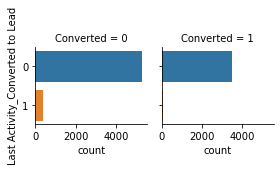

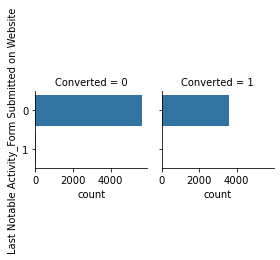

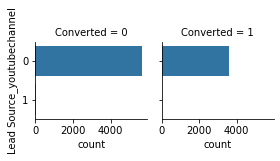

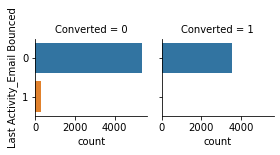

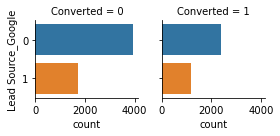

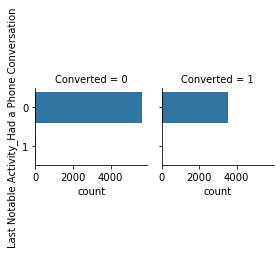

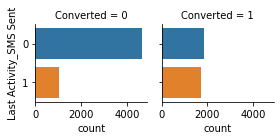

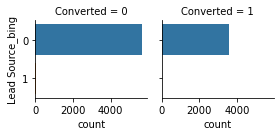

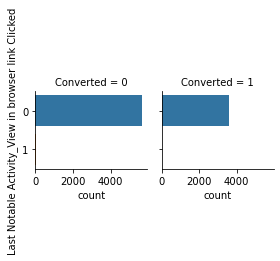

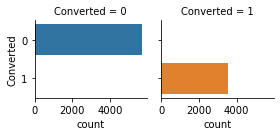

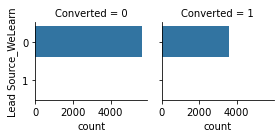

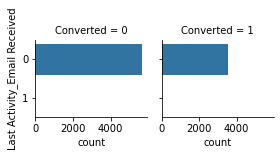

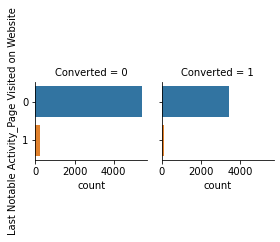

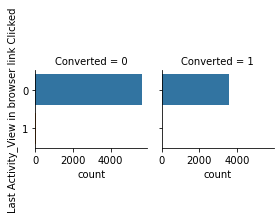

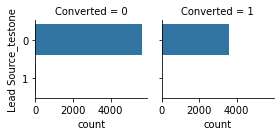

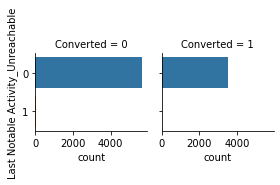

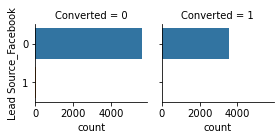

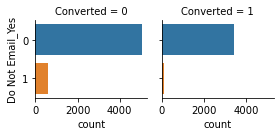

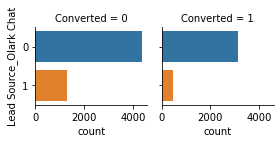

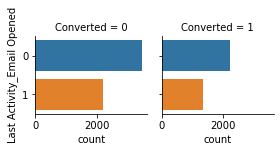

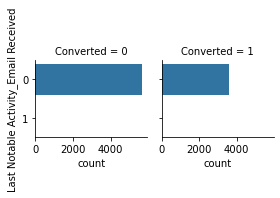

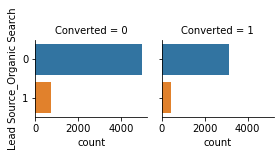

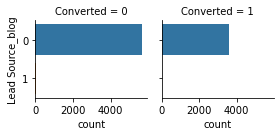

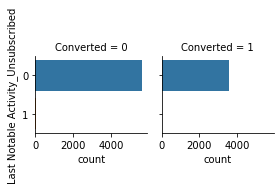

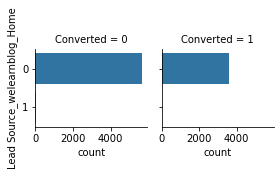

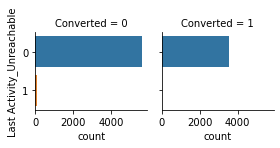

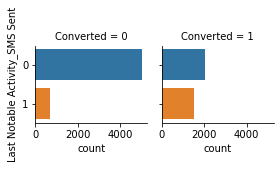

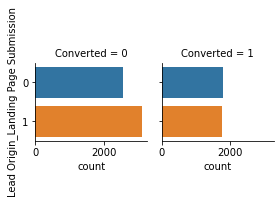

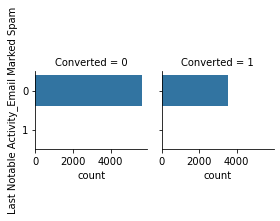

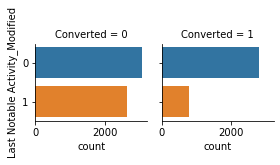

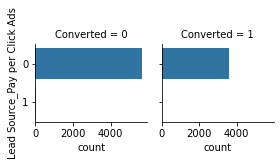

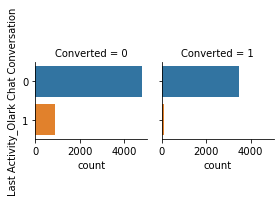

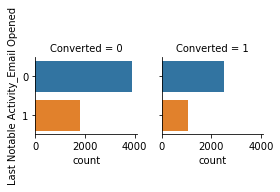

In [625]:
for cat in df_data_usable_columns - numeri_column:
 bivariateAnalysis('Converted',cat)

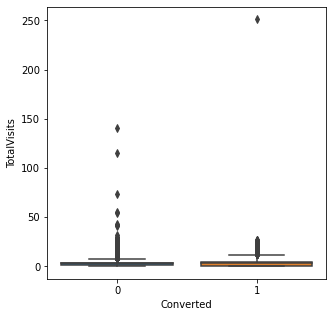

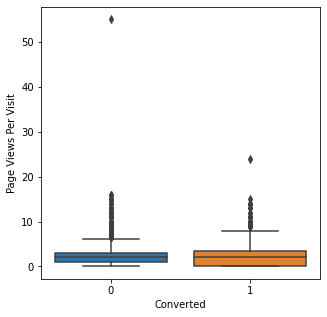

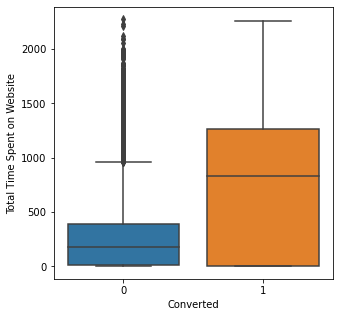

In [626]:
for cat in numeri_column:
  num_col_bivariate_analysis('Converted',cat)

<AxesSubplot:>

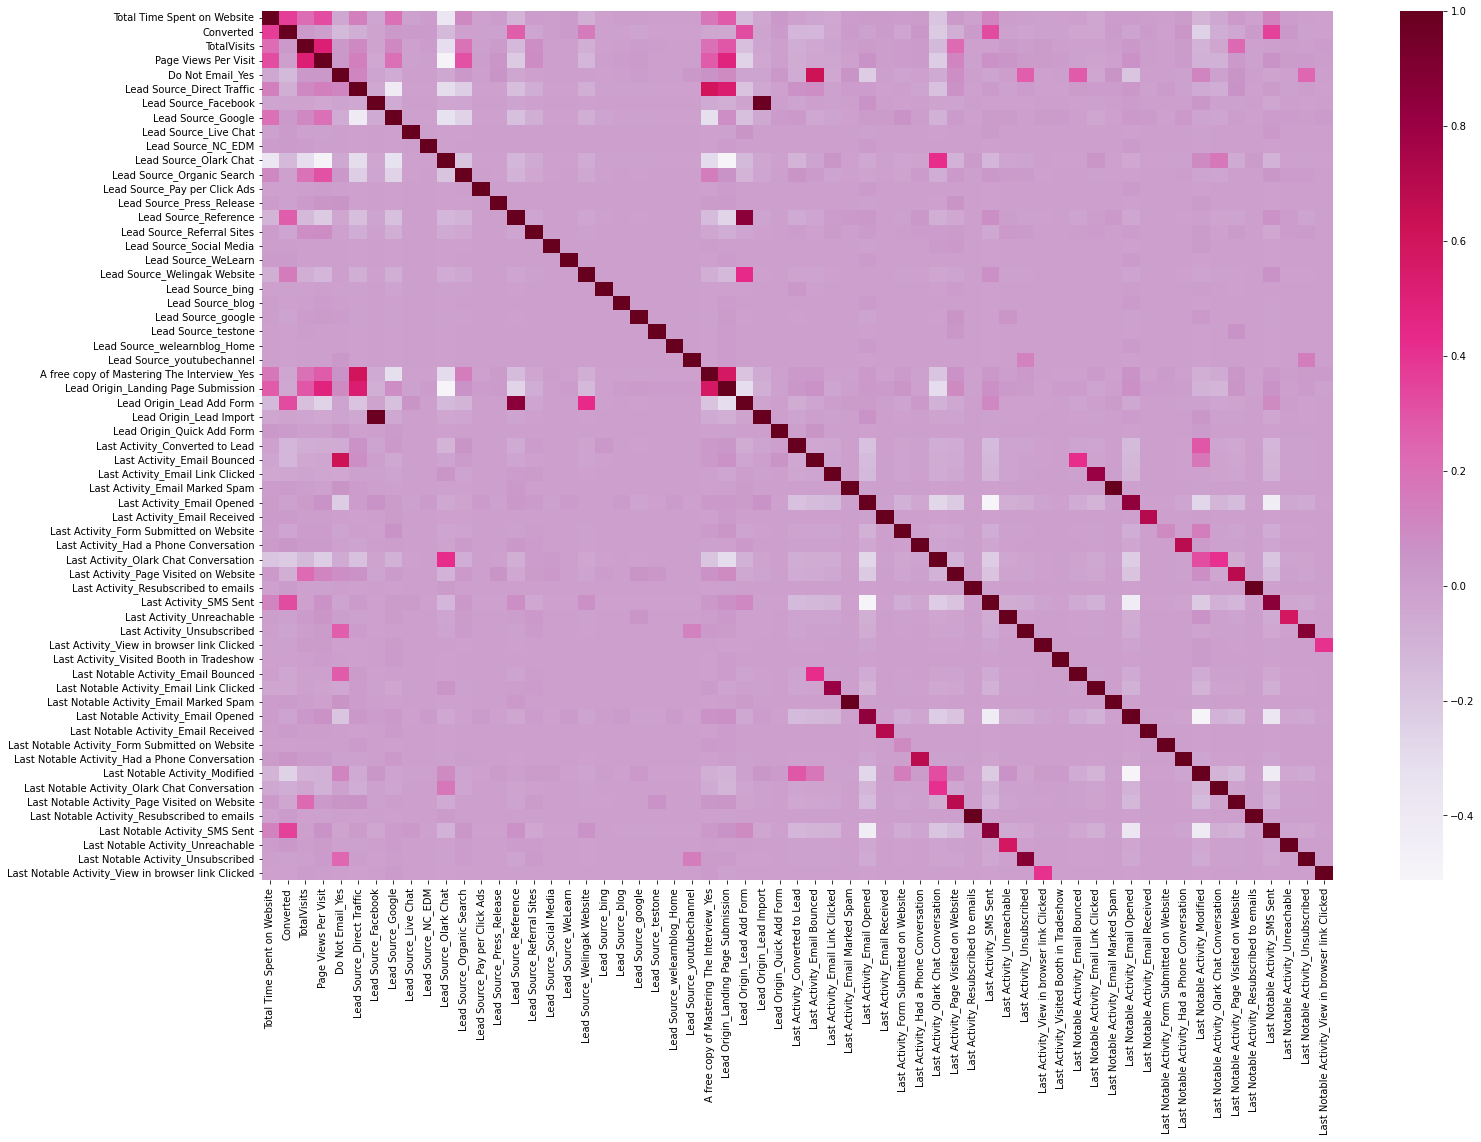

In [627]:
#orrelation between all set of usable columns
plt.figure(figsize=(24, 16))
snsb.heatmap(df_data.corr(), cmap="PuRd")

**Summary**: We have the following points from EDA2: :

1.  Analysis of Variance Conclusion: *Conversion* appears to be impacted by the following dummy variables: 

    *   Lead Source_Reference
    *   Total Time Spent on Website
    *   Last Activity_Email Bounced
    *   Lead Origin_Lead Add Form





---



## Outlier Treatment

In [628]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# the search for outliers 
z = numpy.abs(stats.zscore(df_data))
df_data_outliers = df_data[(z > 3).any(axis=1)]
df_data_non_outliers = df_data[(z < 3).all(axis=1)]
df_data_non_outliers.head()

,Total Time Spent on Website,Converted,TotalVisits,Page Views Per Visit,Do Not Email_Yes,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,674,0,5.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1532,1,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1640,1,2.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0




---



## Feature Standardization / Normalization

In [629]:
# Normalising continuous features (numerical columns)
df = df_data_non_outliers[list(numeri_column)]
normalized_df=(df-df.mean())/df.std()
df_data_non_outliers.drop(columns=numeri_column,axis=1,inplace=True)
dataFrame_dataNormal_nonOutliers = panda.concat([df_data_non_outliers,normalized_df],axis=1)

print(f'% of data retained: {100*(dataFrame_dataNormal_nonOutliers.shape[0]/df_data.shape[0]):.2}')
dataFrame_dataNormal_nonOutliers.head()

% of data retained: 6.5e+01


,Converted,Do Not Email_Yes,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits,Page Views Per Visit,Total Time Spent on Website
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.621490,0.046638,0.264746
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.467274,-0.224659,1.796143
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.193117,-1.309847,-0.938240
6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.467274,-0.224659,1.988906
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.193117,-1.309847,-0.938240




---



## Making Training and Test Sets

In [630]:
# Putting feature variable to X
X = dataFrame_dataNormal_nonOutliers.drop(['Converted'],axis=1)
# Putting response variable to y
y = dataFrame_dataNormal_nonOutliers['Converted']

y.head()

1    0
2    1
5    0
6    1
7    0
Name: Converted, dtype: int64

In [631]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3)



---



## Building Model
**NOTE: The following two models will be created using logistic regression and RFE: **

1.  To target a wider audience, choose a model with moderate accuracy (In case we have more resource to engage wider range of audience) 
2.  Model with High Accuracy: To focus on a specific audience (In case we have less resource and want to minimise engagement) 



## Building Model : Feature Selection using RFE for Logistic Regression

In [632]:
# Running RFE with the output number of the variable equal to 25
logreg = LogisticRegression(C=1e-5,max_iter=50)
# Specifining for 25 steps.
rfe = RFE(logreg, step = 25)
rfe = rfe.fit(X,y)
rfe = rfe.fit(X_train, y_train)
# Printitng rfe.support_
print(rfe.support_)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False  True  True  True  True False
  True  True False False False  True  True False False False  True False
 False  True False False False False False False False  True False False
 False  True False False False  True False False False  True  True  True]


In [633]:
# Order of columns in relation to rank 
print(rfe.ranking_) 

[3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 2 1 1 3 3 3 1 1 3 3 3 1 3 3
 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 1 3 3 3 1 1 1]


In [634]:
selected_predictors = X_train.columns[rfe.support_]
selected_predictors

Index(['Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'A free copy of Mastering The Interview_Yes', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website'],
      dtype='object')

In [635]:
def buildLRModel(col):
 
  X_train_sm = sm.add_constant(X_train[col])
  logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm4.fit()
  print(res.summary())
  print('='*78)
  vif = panda.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif, end='\n'+'='*78+'\n')
  yTrainPred = res.predict(X_train_sm).values.reshape(-1)
  yTrainPred_final = panda.DataFrame({'Converted':y_train.values, 'Conversion_Probability':yTrainPred})
  yTrainPred_final['Lead_ID'] = y_train.index
  yTrainPred_final.head()
  yTrainPred_final['predicted'] = yTrainPred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  print(f'Overall accuracy: {metrics.accuracy_score(yTrainPred_final.Converted, yTrainPred_final.predicted)}')
  print('='*78)
  confusion = metrics.confusion_matrix(yTrainPred_final.Converted, yTrainPred_final.predicted)
  drawRoc(yTrainPred_final.Converted, yTrainPred_final.Conversion_Probability)
  
def buildLrModelAdvanced(col):

  
  X_train_sm = sm.add_constant(X_train[col])
  logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm4.fit()
  print(res.summary())
  vif = panda.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif, end='\n'+'='*78+'\n')
  yTrainPred = res.predict(X_train_sm).values.reshape(-1)
  yTrainPred_final = panda.DataFrame({'Converted':y_train.values, 'Conversion_Probability':yTrainPred})
  yTrainPred_final['Lead_ID'] = y_train.index
  yTrainPred_final.head()
  yTrainPred_final['predicted'] = yTrainPred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  print(f'Overall accuracy: {metrics.accuracy_score(yTrainPred_final.Converted, yTrainPred_final.predicted)}')
  print('='*78)
  confusion = metrics.confusion_matrix(yTrainPred_final.Converted, yTrainPred_final.predicted)
  drawRoc(yTrainPred_final.Converted, yTrainPred_final.Conversion_Probability)
  numbers = [float(x)/10 for x in range(10)]
  for i in numbers:
      yTrainPred_final[i]= yTrainPred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
      
  cutoff_df = panda.DataFrame( columns = ['prob','accuracy','sensi','speci'])
  from sklearn.metrics import confusion_matrix
  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
      cm1 = metrics.confusion_matrix(yTrainPred_final.Converted, yTrainPred_final[i] )
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1

      speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
  
  cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
  plt.show()
  
  cutoff = 0.35 # Taking value after observing graph
  
  yTrainPred_final['final_predicted'] = yTrainPred_final.Conversion_Probability.map( lambda x: 1 if x > cutoff else 0)
  
  print(f'Overall accuracy: {metrics.accuracy_score(yTrainPred_final.Converted, yTrainPred_final.final_predicted)}')
  print('='*78)
  
  print(f'Precision Score: {precision_score(yTrainPred_final.Converted, yTrainPred_final.predicted)}')
  print('='*78)
  
  print(f'Recall Score: {recall_score(yTrainPred_final.Converted, yTrainPred_final.predicted)}')
  print('='*78)
  
  p, r, thresholds = precision_recall_curve(yTrainPred_final.Converted, yTrainPred_final.Conversion_Probability)
  plt.plot(thresholds, p[:-1], "g-")
  plt.plot(thresholds, r[:-1], "r-")
  plt.show()
  cutoff = 0.42 # Taking value after observing graph
  
  # Making Prediction of Test Set
  X_test_sm = sm.add_constant(X_test[col])
  y_test_pred = res.predict(X_test_sm)
  y_pred_1 = panda.DataFrame(y_test_pred)
  # Converting y_test to dataframe
  y_test_df = panda.DataFrame(y_test)
  # Removing index for both dataframes to append them side by side 
  y_pred_1.reset_index(drop=True, inplace=True)
  y_test_df.reset_index(drop=True, inplace=True)
  # Appending y_test_df and y_pred_1
  y_pred_final = panda.concat([y_test_df, y_pred_1],axis=1)
  # print(y_pred_final)
  # Renaming the column 
  y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})
  # Rearranging the columns
  y_pred_final = y_pred_final.reindex(['Lead_ID','Converted','Conversion_Probability'], axis=1)
  y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > cutoff else 0)
  
  # Let's check the overall accuracy on Test set
  print(f'Overall accuracy on Test set: {metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)}')
  print('='*78)
  
  confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
  confusion2
  TP = confusion2[1,1] # true positive 
  TN = confusion2[0,0] # true negatives
  FP = confusion2[0,1] # false positives
  FN = confusion2[1,0] # false negatives
  # Let's see the sensitivity of our logistic regression model
  print(f'sensitivity of our logistic regression model: {TP / float(TP+FN)}')
  print('='*78)
  # Let's see the specificity of our logistic regression model
  print(f'specificity of our logistic regression model: {TN / float(TN+FP)}')
  print('='*78)

In [636]:
def drawRoc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True (+)ve Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

## Building Model using Logistic Regression

Columns Count : 30
Columns :  ['Lead Source_Google', 'Lead Source_Live Chat', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'Lead Source_WeLearn', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Last Activity_Email Marked Spam', 'Lead Source_Facebook', 'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Lead Source_Organic Search', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_welearnblog_Home', 'Lead Source_Press_Release', 'Lead Source_Welingak Website', 'Last Notable Activity_SMS Sent', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Referral Sites', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened', 'Lead Source_youtubechannel']
                 Generalized Linear Model Regression Results                  

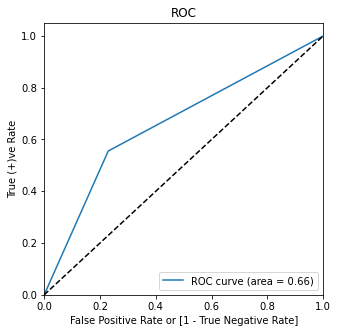

In [637]:
# MODEL -  1
# consider all 25 the columns suggested by RFE for our next model
selected_predictors = set(selected_predictors)
removed_predictors = set()
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 30
Columns :  ['Lead Source_Google', 'Lead Source_Live Chat', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'Lead Source_WeLearn', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Last Activity_Email Marked Spam', 'Lead Source_Facebook', 'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Lead Source_Organic Search', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_welearnblog_Home', 'Lead Source_Press_Release', 'Lead Source_Welingak Website', 'Last Notable Activity_SMS Sent', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Referral Sites', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened', 'Lead Source_youtubechannel']
                 Generalized Linear Model Regression Results                  

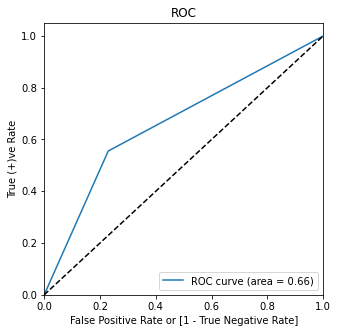

In [638]:
# MODEL- 2
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Resubscribed to emails')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 29
Columns :  ['Lead Source_Google', 'Lead Source_Live Chat', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'Lead Source_WeLearn', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Source_Facebook', 'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Lead Source_Organic Search', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_welearnblog_Home', 'Lead Source_Press_Release', 'Lead Source_Welingak Website', 'Last Notable Activity_SMS Sent', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Referral Sites', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened', 'Lead Source_youtubechannel']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              C

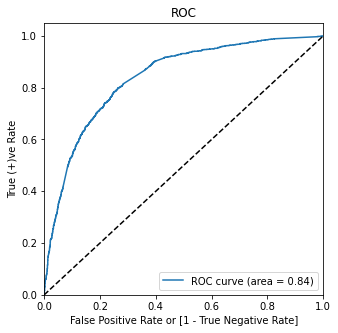

In [639]:
# MODEL - 3
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Direct Traffic')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 28
Columns :  ['Lead Source_Google', 'Lead Source_Live Chat', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'Lead Source_WeLearn', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Source_Facebook', 'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_welearnblog_Home', 'Lead Source_Press_Release', 'Lead Source_Welingak Website', 'Last Notable Activity_SMS Sent', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Referral Sites', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened', 'Lead Source_youtubechannel']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:  

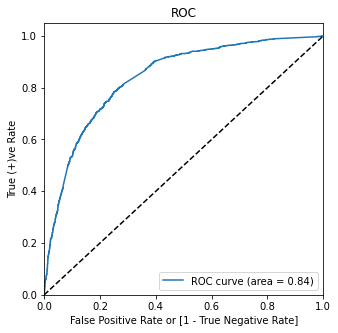

In [640]:
# MODEL- 4
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Organic Search')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 27
Columns :  ['Lead Source_Google', 'Lead Source_Live Chat', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'Lead Source_WeLearn', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Source_Facebook', 'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_welearnblog_Home', 'Lead Source_Press_Release', 'Lead Source_Welingak Website', 'Last Notable Activity_SMS Sent', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Referral Sites', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation', 'Lead Source_youtubechannel']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:            

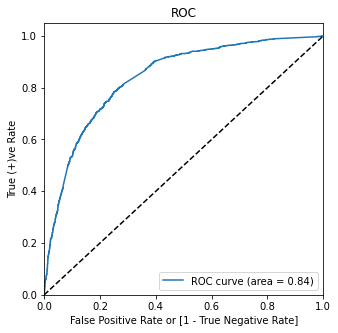

In [641]:
# MODEL-5
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Email Opened')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 26
Columns :  ['Lead Source_Google', 'Lead Source_Live Chat', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'Lead Source_WeLearn', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Source_Facebook', 'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_welearnblog_Home', 'Lead Source_Press_Release', 'Last Notable Activity_SMS Sent', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Referral Sites', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation', 'Lead Source_youtubechannel']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residua

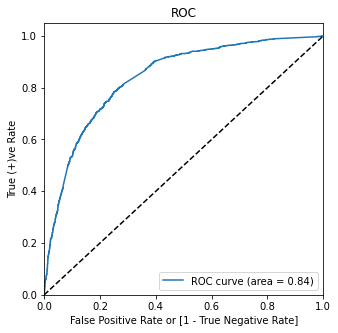

In [642]:
# MODEL-6
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Welingak Website')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 26
Columns :  ['Lead Source_Google', 'Lead Source_Live Chat', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'Lead Source_WeLearn', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Source_Facebook', 'Lead Origin_Quick Add Form', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_welearnblog_Home', 'Lead Source_Press_Release', 'Last Notable Activity_SMS Sent', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Referral Sites', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation', 'Lead Source_youtubechannel']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residua

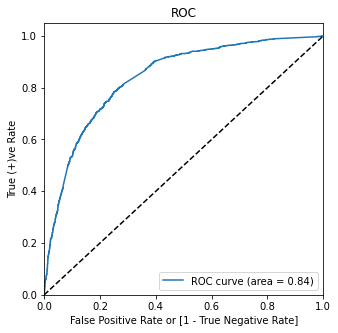

In [643]:
# MODEL-7
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Page Visited on Website')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 25
Columns :  ['Lead Source_Live Chat', 'A free copy of Mastering The Interview_Yes', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Origin_Quick Add Form', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_Press_Release', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Source_Referral Sites', 'Lead Source_youtubechannel', 'Lead Source_Google', 'Lead Source_WeLearn', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Lead Source_welearnblog_Home', 'Last Notable Activity_SMS Sent', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     41

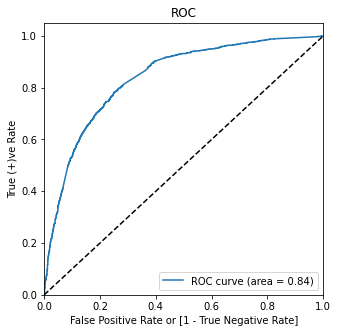

In [644]:
# MODEL-8
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_SMS Sent')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 25
Columns :  ['Lead Source_Live Chat', 'A free copy of Mastering The Interview_Yes', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Origin_Quick Add Form', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_Press_Release', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Source_Referral Sites', 'Lead Source_youtubechannel', 'Lead Source_Google', 'Lead Source_WeLearn', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Lead Source_welearnblog_Home', 'Last Notable Activity_SMS Sent', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Last Notable Activity_Modified', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     41

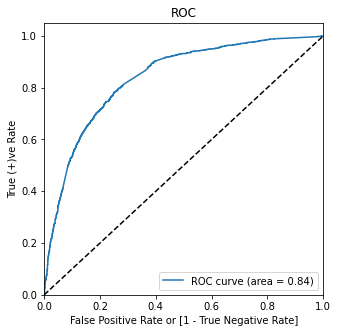

In [645]:
# MODEL-9
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_View in browser link Clicked')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 24
Columns :  ['Lead Source_Live Chat', 'A free copy of Mastering The Interview_Yes', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Origin_Quick Add Form', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_Press_Release', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Source_Referral Sites', 'Lead Source_youtubechannel', 'Lead Source_Google', 'Lead Source_WeLearn', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Last Activity_Email Opened', 'Lead Source_welearnblog_Home', 'Last Notable Activity_SMS Sent', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4170
Model Family:                Bi

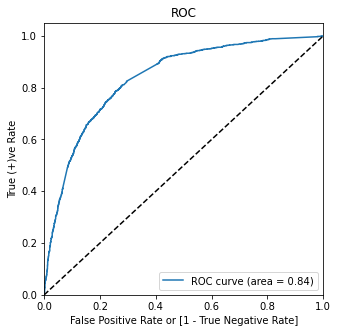

In [646]:
# MODEL-10
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Modified')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 23
Columns :  ['Lead Source_Live Chat', 'A free copy of Mastering The Interview_Yes', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Origin_Quick Add Form', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_Press_Release', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Source_Referral Sites', 'Lead Source_youtubechannel', 'Lead Source_Google', 'Lead Source_WeLearn', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_welearnblog_Home', 'Last Notable Activity_SMS Sent', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4171
Model Family:                Binomial   Df Model:            

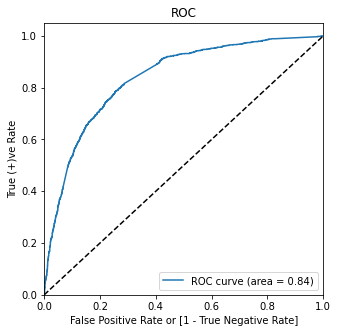

In [647]:
# MODEL-11
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Email Opened')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 22
Columns :  ['Lead Source_Live Chat', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Origin_Quick Add Form', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_Press_Release', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Source_Referral Sites', 'Lead Source_youtubechannel', 'Lead Source_Google', 'Lead Source_WeLearn', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_welearnblog_Home', 'Last Notable Activity_SMS Sent', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:              

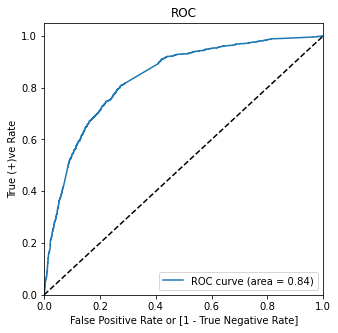

In [648]:
# MODEl-12
#consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('A free copy of Mastering The Interview_Yes')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 22
Columns :  ['Lead Source_Live Chat', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Origin_Quick Add Form', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_Press_Release', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Source_Referral Sites', 'Lead Source_youtubechannel', 'Lead Source_Google', 'Lead Source_WeLearn', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_welearnblog_Home', 'Last Notable Activity_SMS Sent', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:              

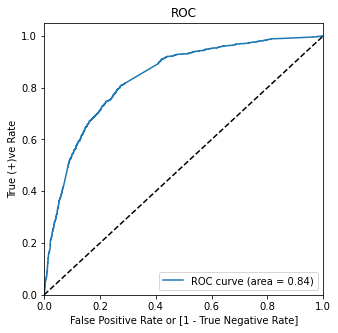

In [649]:
# MODEL-13
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Email Marked Spam')
buildLRModel(list(selected_predictors-removed_predictors))

Columns Count : 22
Columns :  ['Lead Source_Live Chat', 'Lead Origin_Lead Import', 'Last Activity_Email Marked Spam', 'Lead Origin_Quick Add Form', 'Total Time Spent on Website', 'Lead Source_Reference', 'TotalVisits', 'Lead Source_Press_Release', 'Lead Source_NC_EDM', 'Lead Source_Social Media', 'Lead Source_Referral Sites', 'Lead Source_youtubechannel', 'Lead Source_Google', 'Lead Source_WeLearn', 'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_welearnblog_Home', 'Last Notable Activity_SMS Sent', 'Lead Origin_Landing Page Submission', 'Page Views Per Visit', 'Lead Source_Pay per Click Ads', 'Last Activity_Olark Chat Conversation']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:              

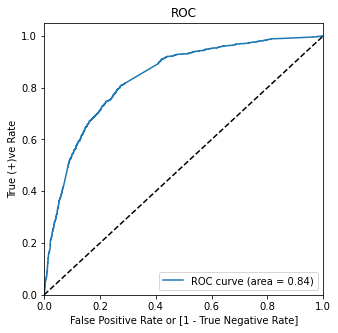

In [650]:
# MODEL-14
# consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Had a Phone Conversation')
buildLRModel(list(selected_predictors-removed_predictors))

**Note: VIF as well as accuracy looks fine, thus computing more metrics for this model.**

## Final Model Building and Analysis

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.9
Date:                Tue, 25 Oct 2022   Deviance:                       4107.7
Time:                        18:56:56   Pearson chi2:                 4.33e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3053
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

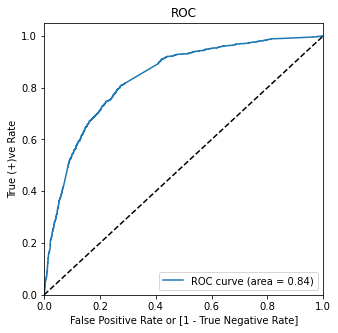

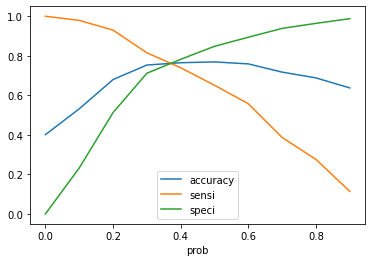

Overall accuracy: 0.7593877062903611
Precision Score: 0.7411684782608695
Recall Score: 0.6509546539379475


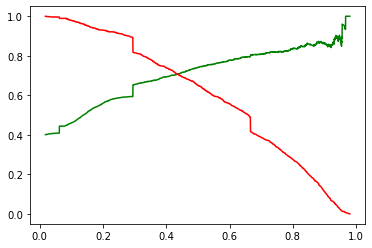

Taking cut-off value as 0.42, from the plot above
Overall accuracy on Test set: 0.7879464285714286
sensitivity of our logistic regression model: 0.749648382559775
specificity of our logistic regression model: 0.81313598519889


In [651]:
# Building model again, and obtaining additional parameters like cut-off
# Making predictions on Test set using this final model
buildLrModelAdvanced(list(selected_predictors-removed_predictors))

<AxesSubplot:>

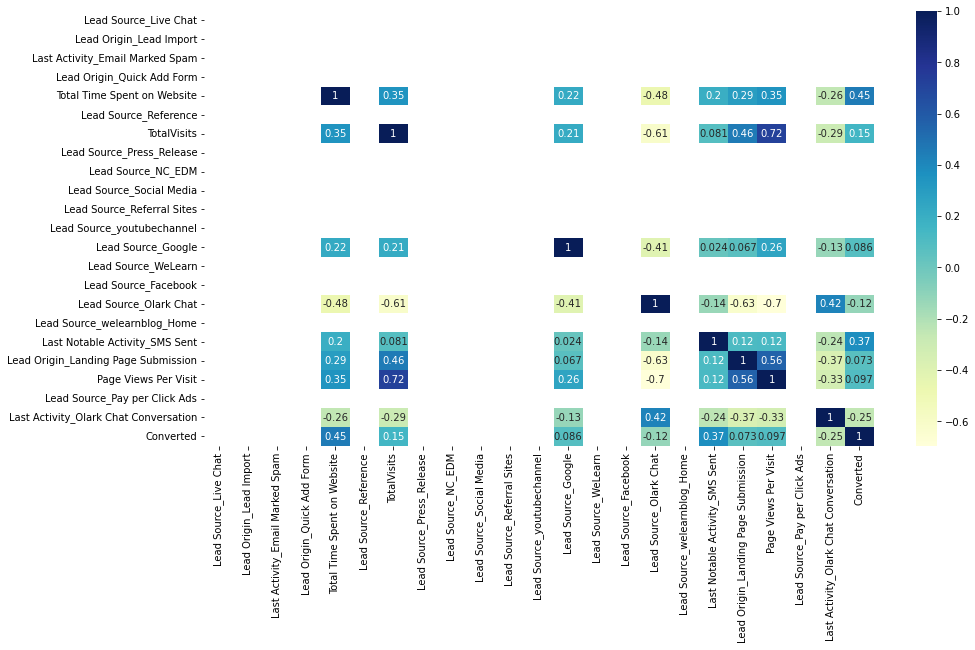

In [652]:
# Analysis of our final model's columns in relation to "Converted" 
col = list(selected_predictors-removed_predictors)
col.append('Converted')
plt.figure(figsize=(15, 8))
snsb.heatmap(dataFrame_dataNormal_nonOutliers[col].corr(), cmap="YlGnBu",annot=True)

**Final Model Summary**:
  1. The overall test set accuracy was 0.786.
  2. Our logistic regression model's sensitivity score is 0.733.
  3. Our logistic regression model's specificity score is 0.823.
  4. The top three factors in the model that influence lead conversion are:
        Total Website Visits, Last SMS Sent Activity, and Total Time Spent
  5. The top 3 factors in my model on which attention should be paid are:
        The following factors had an impact: a. Last Activity SMS Sent (positively); b. Last Activity Olark Chat Conversation (negatively); c. Lead Source Olark Chat (negatively impacting) 


## Using Logistic Regression to check if the accuracy is sufficient 
## Model Construction Using PCA to Check Model Accuracy 
**NOTE: We are using PCA to see how accurate our Logistic Regression model is by comparing it to other models.
Due to the following reasons, PCA is NOT being utilised to generate the final model: **

1.   Principal components would be obtained via PCA, but it wouldn't be intuitive to relate them to the original qualities. 
2.   In our circumstance, the majority of the variables are categorical, thus PCA isn't a great solution for dealing with them. 





## Pre-Requisites for Performing PCA 

In [653]:
pca = PCA(svd_solver='randomized', random_state=100)

In [654]:
pca.fit(dataFrame_dataNormal_nonOutliers)

PCA(random_state=100, svd_solver='randomized')

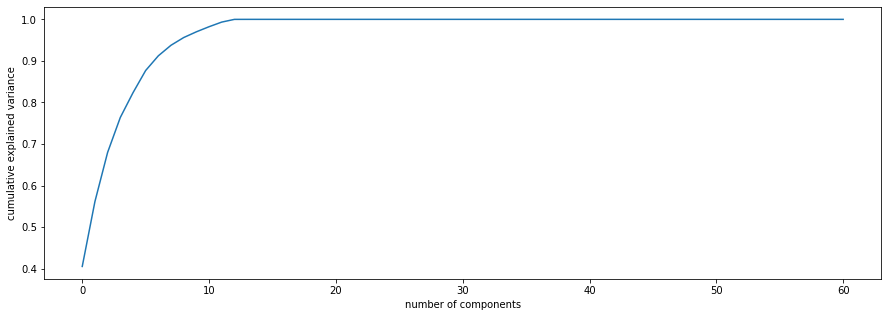

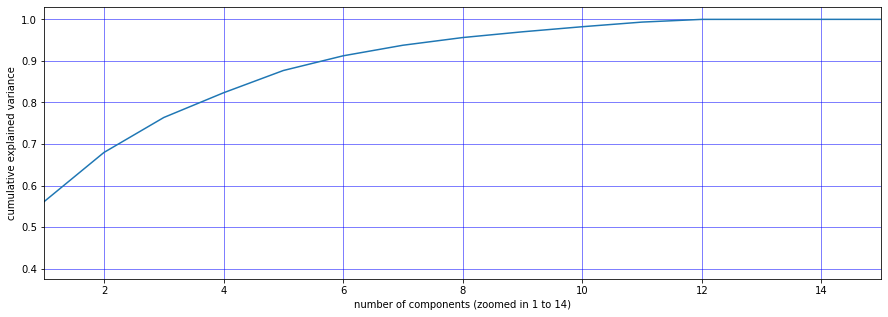

In [655]:
fig = plt.figure(figsize = (15,5))
ax = plt.plot(numpy.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

fig = plt.figure(figsize = (15,5))
ax = plt.plot(numpy.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components (zoomed in 1 to 14)')
plt.ylabel('cumulative explained variance')
plt.grid(color='b', linestyle='-', linewidth=.5)
plt.xlim(1,15)
plt.show()



---



## Using a 75% Variance Cut-off for PCA (Moderate Accuracy) 
**USE CASE: If we have a larger staff to contact the hot leads individually on phone calls, this could assist us discover a greater number of possible hot leads and allow us to concentrate on a larger audience. **

In [656]:
X_train.shape

(4181, 60)

In [657]:
pca_moderate = PCA(0.75)

In [658]:
df_train_pca_moderate = pca_moderate.fit_transform(X_train)
df_train_pca_moderate.shape
# PCA selected 5components to explain 90% variance in data

(4181, 4)

In [659]:
# Training the Regression Model
learner_pca_moderate = LogisticRegression()
model_pca_lr_moderate = learner_pca_moderate.fit(df_train_pca_moderate,y_train)

In [660]:
df_test_pca_moderate = pca_moderate.transform(X_test)
df_test_pca_moderate.shape

(1792, 4)

In [661]:
#Making prediction on the test data
pred_proba_test_moderate = model_pca_lr_moderate.predict_proba(df_test_pca_moderate)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_moderate))

'0.80'



---



## Performing PCA (High Accuracy) with 90% Variance Cut-Off


In [662]:
X_train.shape

(4181, 60)

In [663]:
pca_high = PCA(0.90)

In [664]:
df_train_pca_high = pca_high.fit_transform(X_train)
df_train_pca_high.shape


(4181, 7)

In [665]:
learner_pca_high = LogisticRegression()
model_pca_lr_high = learner_pca_high.fit(df_train_pca_high,y_train)

In [666]:
df_test_pca_high = pca_high.transform(X_test)
df_test_pca_high.shape

(1792, 7)

In [667]:
pred_proba_test_high = model_pca_lr_high.predict_proba(df_test_pca_high)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_high))

'0.84'

## Conclusion
To raise the overall conversion rate, X Education Company must concentrate on the following important factors:

Increasing user engagement on a website will result in more visitors overall, which will enhance conversion.

Users should receive notifications 


    